In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Real_Estate.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction date                     414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   Number of convenience stores         414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [7]:
df.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-13 03:16:11.247379200,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
min,2012-09-02 16:42:30.519336,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,2012-11-21 03:54:22.174344448,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,2013-02-12 00:48:02.949638400,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,2013-05-02 09:55:51.372080640,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,2013-08-01 09:49:41.506402,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716
std,NaN,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935


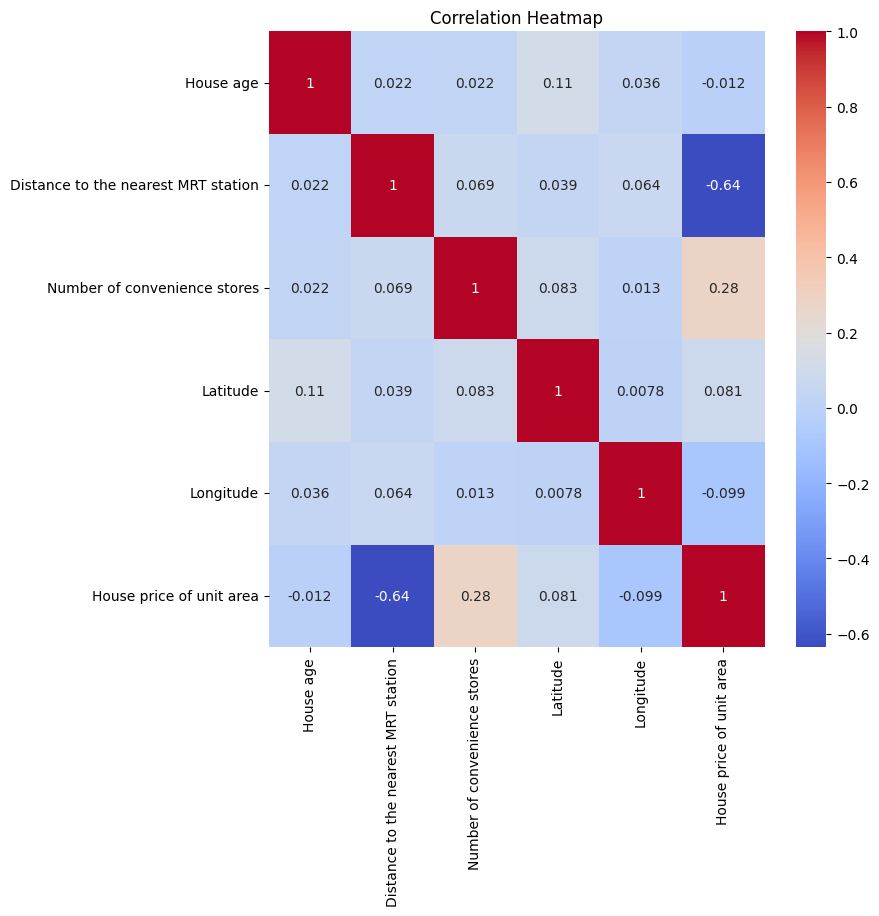

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

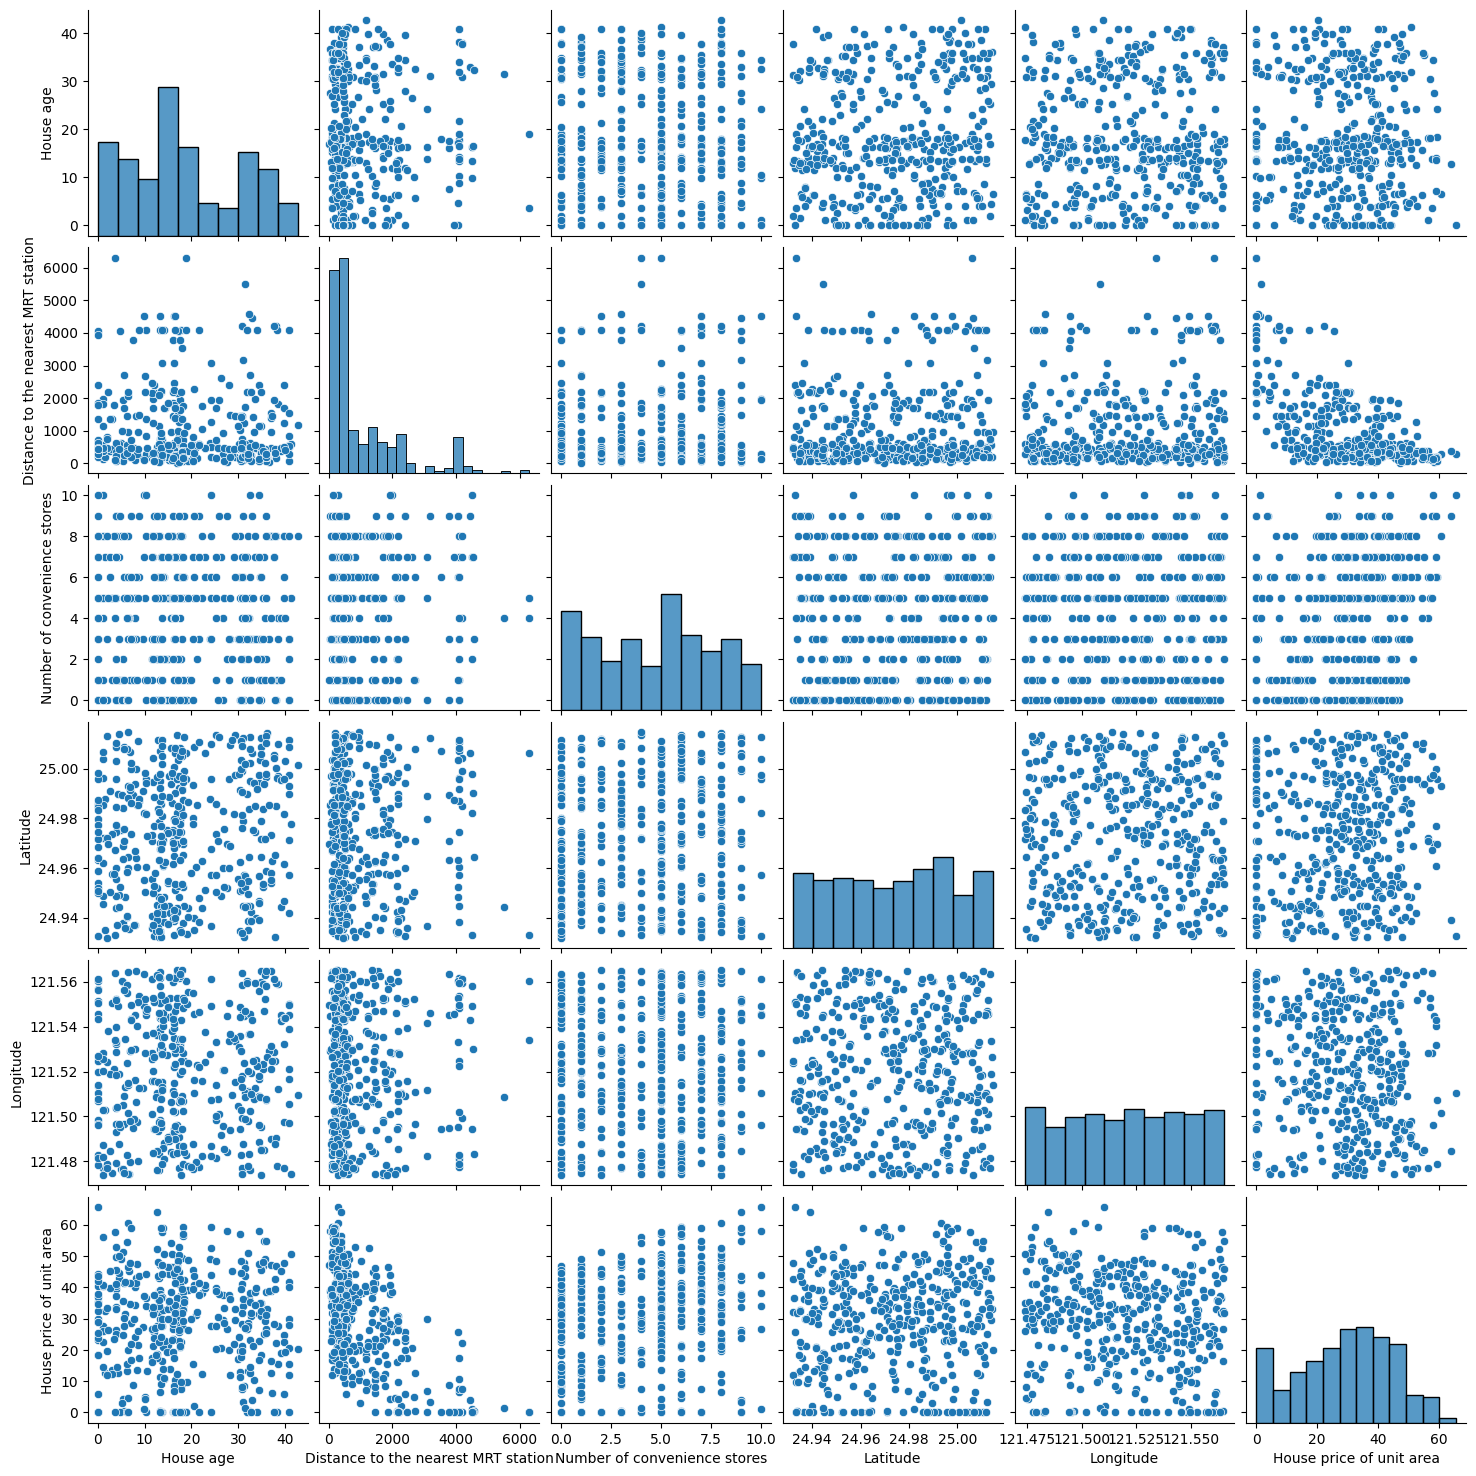

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
x = df.drop(['House price of unit area', 'Transaction date'], axis=1)
y = df['House price of unit area']

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = x.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

                               feature           VIF
0                            House age  3.495719e+00
1  Distance to the nearest MRT station  1.802904e+00
2         Number of convenience stores  3.233093e+00
3                             Latitude  1.036750e+06
4                            Longitude  1.036172e+06


In [14]:
from sklearn.model_selection import cross_val_score, train_test_split

lr_clf = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Cross-validation
cv_scores = cross_val_score(lr_clf, x, y, cv=2)  # 5-fold cross-validation
mean_cv_score = 100 * np.mean(cv_scores)
print(f'Cross-Validation Mean Score = {mean_cv_score:4.4f}%')

# Training and testing on the split data
lr_clf.fit(x_train, y_train)
score_lr = 100 * lr_clf.score(x_test, y_test)
print(f'LR Model score on test set = {score_lr:4.4f}%')

Cross-Validation Mean Score = 50.5417%
LR Model score on test set = 54.9566%
